In [96]:
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
import numpy as np
from sklearn.manifold import TSNE
# import kmeans
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


In [2]:
vector = FAISS.load_local("faiss_index_pregnant_women", OpenAIEmbeddings(model="text-embedding-3-small"), allow_dangerous_deserialization=True)

In [ ]:
vector

In [25]:
embeddings_recontructed = np.array([vector.index.reconstruct_n(idx, 1)[0] for idx in range(1900)])

In [26]:
tsne = TSNE(n_components=2, random_state=42)

In [37]:
reduced_data = tsne.fit_transform(embeddings_recontructed)

In [35]:
# kmeans = KMeans(n_clusters=5, random_state=42).fit(reduced_data)
# for i, d in enumerate(documents):
#     d.metadata['cluster'] = kmeans.labels_[i]

In [69]:
reduced_data.shape

(1900, 2)

In [99]:
# create 3 paritions of data where 1st partition is values whose y-axis is above 40
# 2nd partition is values whose x-axis is above 10 and y-axis below 40
# 3rd partition is values whose x-axis is below 10 and y-axis below 40

partition_1 = reduced_data[reduced_data[:, 1] > 40]
partition_2 = reduced_data[(reduced_data[:, 0] > 10) & (reduced_data[:, 1] < 40)]
partition_3 = reduced_data[(reduced_data[:, 0] < 10) & (reduced_data[:, 1] < 40)]

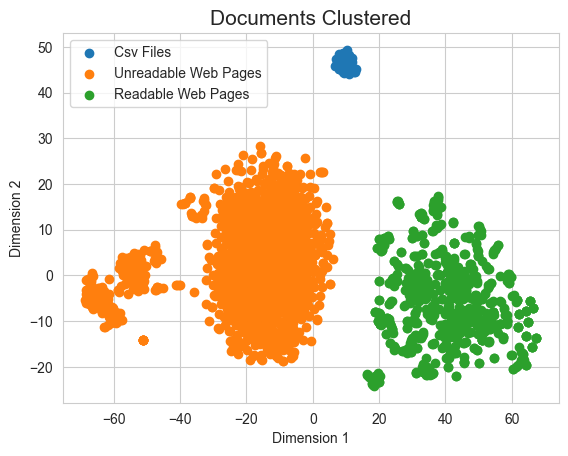

<Figure size 3000x3000 with 0 Axes>

In [108]:
# plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.scatter(partition_1[:, 0], partition_1[:, 1], label="Csv Files")
plt.scatter(partition_3[:, 0], partition_3[:, 1], label="Unreadable Web Pages")
plt.scatter(partition_2[:, 0], partition_2[:, 1], label="Readable Web Pages")
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Documents Clustered')
# legend outside the plot
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend()
plt.title('Documents Clustered', fontsize=15)
plt.figure(figsize=(10, 10), dpi=300)
plt.show()

In [ ]:
X-axis
1128 chunks < 0
722 > 0 

Y-axis
50

In [94]:
# check for indices where x is less then 10 and y is less than 30

np.where((reduced_data[:, 0] < -60) & (reduced_data[:, 1] < 30))[0]

array([ 696,  697, 1156, 1159, 1166, 1169, 1176, 1184, 1192, 1201, 1210,
       1217, 1225, 1232, 1239, 1247, 1254, 1261, 1268, 1275, 1282, 1289,
       1297, 1303, 1308, 1312, 1318, 1323, 1334, 1339, 1345, 1351, 1357,
       1368, 1374, 1380, 1386, 1391, 1396, 1397, 1402, 1407, 1412, 1418,
       1424, 1453, 1465, 1471, 1477, 1488, 1494, 1500, 1506, 1511, 1517,
       1522, 1528, 1534, 1540, 1546, 1552, 1558, 1564, 1571, 1576, 1581,
       1586, 1592, 1597, 1602, 1608, 1613, 1619, 1624, 1628, 1633, 1813,
       1814])

In [52]:
np.expand_dims(embeddings_recontructed[0], axis=0)

(1, 1536)

In [59]:
vector.index.search_and_reconstruct(np.expand_dims(embeddings_recontructed[0], axis=0), 10)

(array([[0.        , 0.626551  , 0.6421972 , 0.6530472 , 0.6854473 ,
         0.69233555, 0.69434905, 0.7011586 , 0.7053275 , 0.7073995 ]],
       dtype=float32),
 array([[ 0, 34, 48, 37, 13,  8, 47, 45,  6, 15]]),
 array([[[-0.03097132,  0.01512677,  0.05367477, ..., -0.02592021,
          -0.04474227, -0.01830366],
         [-0.06251872, -0.01369584,  0.04559099, ..., -0.02332531,
          -0.00784133, -0.01303356],
         [-0.05467894,  0.00534051,  0.05874556, ..., -0.00737994,
          -0.01455165, -0.04546779],
         ...,
         [-0.04239377,  0.04701194,  0.02913599, ...,  0.00488735,
          -0.02952516, -0.03375416],
         [-0.05081998,  0.00830912,  0.02887973, ..., -0.00526983,
          -0.02153588, -0.04082816],
         [-0.05935182,  0.03330353,  0.06348328, ..., -0.01073799,
          -0.01781058, -0.03229586]]], dtype=float32))

13